<a href="https://colab.research.google.com/github/sadidoll/Machine-Learning/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning for Recommender Systems**

##Building a small recommender system with the matrix data: “ratings_small.csv”. 




In [3]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 312kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617545 sha256=f626bc0f5d888e091446830b762574d3ec422b6a5dd2476cca02b037a5f420ff
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [108]:
## Imports
from surprise import SVD
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

import os
import matplotlib.pyplot as plt
import pandas as pd


In [109]:
from google.colab import files
uploaded = files.upload()

Saving ratings_small.csv to ratings_small (3).csv


##**a.   Read data from “ratings_small.csv” with line format: 'userID movieID rating timestamp'**


In [14]:
ratings_df = pd.read_csv('ratings_small.csv')
print('Reading_small Data: ', ratings_df.columns)

Reading_small Data:  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [52]:
ratings_df.drop('timestamp', axis = 1)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5




##**b. MAE and RMSE are two famous metrics for evaluating the performances of a recommender system.**

##**c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation** 




In [28]:
reader = Reader(rating_scale=(0.5,5.0))
ratings_data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']],reader=reader)

In [29]:
## Computing Average MAE and RMSE of the Probablistic Matrix Factorization(PMF) under 5-folds cross-validation
algo = SVD(biased=False)
PMF_res = cross_validate(algo, ratings_data, measures=['RMSE', 'MAE'], cv = 5,verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0111  1.0125  1.0122  1.0072  1.0236  1.0133  0.0055  
MAE (testset)     0.7783  0.7825  0.7805  0.7772  0.7877  0.7812  0.0037  
Fit time          5.03    5.07    5.03    5.04    5.03    5.04    0.02    
Test time         0.13    0.23    0.13    0.13    0.24    0.17    0.05    


In [31]:
## Computing Average MAE and RMSE of the User based Collaborative Filtering under 5-folds cross-validation
User_Coll_filter = KNNBasic(sim_options={'user_based': True})
UCF = cross_validate(User_Coll_filter, ratings_data,measures=['RMSE', 'MAE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9672  0.9761  0.9686  0.9622  0.9715  0.9691  0.0046  
MAE (testset)     0.7450  0.7507  0.7409  0.7412  0.7470  0.7450  0.0037  
Fit time          0.17    0.21    0.20    0.21    0.21    0.20    0.02    
Test time         1.95    1.83    1.95    1.80    1.81    1.87    0.07    


In [32]:
## Computing Average MAE and RMSE of the Item based Collaborative Filtering under 5-folds cross-validation
Item_Coll_filter = KNNBasic(sim_options={'user_based': False})
ICF = cross_validate(User_Coll_filter, ratings_data,measures=['RMSE', 'MAE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9596  0.9740  0.9738  0.9646  0.9744  0.9693  0.0061  
MAE (testset)     0.7391  0.7476  0.7470  0.7413  0.7501  0.7450  0.0041  
Fit time          0.22    0.20    0.20    0.20    0.21    0.21    0.01    
Test time         1.91    1.81    1.90    1.85    1.93    1.88    0.04    




##**d. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE.**



In [58]:
compare_res_df = pd.DataFrame(columns=['RMSE Average','MAE Average'], index = ['Probabilistic Matrix Factorization','UserBased_Collaborative filtering','ItemBased_Collaborative filtering'])

compare_res_df.loc['Probabilistic Matrix Factorization']['RMSE Average'] = PMF_res['test_rmse'].mean()
compare_res_df.loc['UserBased_Collaborative filtering']['RMSE Average'] = UCF['test_rmse'].mean()
compare_res_df.loc['ItemBased_Collaborative filtering']['RMSE Average'] = ICF['test_rmse'].mean()

compare_res_df.loc['Probabilistic Matrix Factorization']['MAE Average'] = PMF_res['test_mae'].mean()
compare_res_df.loc['UserBased_Collaborative filtering']['MAE Average'] = UCF['test_mae'].mean()
compare_res_df.loc['ItemBased_Collaborative filtering']['MAE Average'] = ICF['test_mae'].mean()

print(compare_res_df)

                                   RMSE Average MAE Average
Probabilistic Matrix Factorization      1.01332    0.781228
UserBased_Collaborative filtering      0.969128    0.744959
ItemBased_Collaborative filtering      0.969258    0.745024


##**e.	Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results.**


In [40]:
## Cosine similarity 
cosine_user_Coll_filter = KNNBasic(sim_options={'name': 'cosine','user_based': True})
CUCF = cross_validate(cosine_user_Coll_filter, ratings_data,measures=['RMSE'], cv = 5,verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9903  0.9905  0.9911  1.0062  0.9976  0.9951  0.0062  
Fit time          0.46    0.49    0.47    0.48    0.48    0.47    0.01    
Test time         1.96    1.85    1.95    1.82    1.83    1.88    0.06    


In [41]:
## Mean Squared Differnce (MSD) 
MSD_user_Coll_filter = KNNBasic(sim_options={'name': 'MSD','user_based': True})
MSDUCF = cross_validate(MSD_user_Coll_filter, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9775  0.9741  0.9603  0.9626  0.9726  0.9694  0.0067  
Fit time          0.17    0.21    0.20    0.20    0.21    0.20    0.01    
Test time         2.01    1.82    1.98    1.82    1.95    1.92    0.08    


In [42]:
## Pearson Similarity
Pearson_user_Coll_filter = KNNBasic(sim_options={'name': 'pearson','user_based': True})
PUCF = cross_validate(Pearson_user_Coll_filter, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0050  1.0002  0.9968  1.0012  0.9930  0.9992  0.0041  
Fit time          0.63    0.66    0.64    0.65    0.65    0.64    0.01    
Test time         1.81    1.90    1.77    1.94    1.83    1.85    0.06    


In [43]:
## Cosine similarity Item based
cosine_item_Coll_filter = KNNBasic(sim_options={'name': 'cosine','user_based': False})
CICF = cross_validate(cosine_item_Coll_filter, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9938  0.9957  1.0018  0.9961  0.9855  0.9946  0.0053  
Fit time          16.47   15.73   19.07   16.48   15.06   16.56   1.36    
Test time         8.18    9.61    8.39    8.64    8.14    8.59    0.54    


In [44]:
## Mean Squared Differnce (MSD)  Item based
MSD_item_Coll_filter = KNNBasic(sim_options={'name': 'MSD','user_based': False})
MSDICF = cross_validate(MSD_item_Coll_filter, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9414  0.9390  0.9338  0.9279  0.9312  0.9347  0.0050  
Fit time          4.09    4.40    4.62    4.46    4.32    4.38    0.17    
Test time         8.42    8.57    9.06    8.86    8.56    8.70    0.23    


In [45]:
## Pearson Similarity
Pearson_item_Coll_filter = KNNBasic(sim_options={'name': 'pearson','user_based': False})
PICF = cross_validate(Pearson_item_Coll_filter, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9941  0.9878  0.9840  0.9923  0.9904  0.9897  0.0035  
Fit time          21.87   24.34   22.55   22.54   22.40   22.74   0.84    
Test time         8.33    9.60    8.79    9.23    8.92    8.98    0.42    


In [63]:
## comparision 
compare_df = pd.DataFrame(columns=['Cosine','MSD','Pearson'], index = ['UserBased_Collaborative filtering','ItemBased_Collaborative filtering'])

compare_df.loc['UserBased_Collaborative filtering']['Cosine'] = CUCF['test_rmse'].mean()
compare_df.loc['UserBased_Collaborative filtering']['MSD'] = MSDUCF['test_rmse'].mean()
compare_df.loc['UserBased_Collaborative filtering']['Pearson'] = PUCF['test_rmse'].mean()

compare_df.loc['ItemBased_Collaborative filtering']['Cosine'] = CICF['test_rmse'].mean()
compare_df.loc['ItemBased_Collaborative filtering']['MSD'] = MSDICF['test_rmse'].mean()
compare_df.loc['ItemBased_Collaborative filtering']['Pearson'] = PICF['test_rmse'].mean()

print(compare_df)

                                     Cosine       MSD   Pearson
UserBased_Collaborative filtering  0.995143   0.96942  0.999237
ItemBased_Collaborative filtering   0.99458  0.934661  0.989718


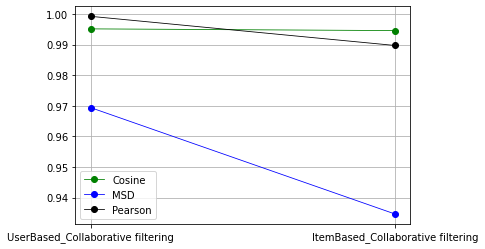

In [84]:
## Plot the results

plt.figure()
plt.plot([0.,1.], compare_df['Cosine'],'-go', label='Cosine',linewidth=0.8)
plt.plot([0,1], compare_df['MSD'],'-bo',label='MSD',linewidth=0.8)
plt.plot([0,1], compare_df['Pearson'],'-ko', label='Pearson',linewidth=0.8)

plt.xticks([0,1], ['UserBased_Collaborative filtering','ItemBased_Collaborative filtering'])
plt.legend()
plt.grid()
plt.show();

##**Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?**



No the metrics are not consistent between the User based CF and Item CF. Item based CF seem to work best with the least value of RMSE for the Mean squared Difference(MSD). User based CF seem to have a bad perforamnce for Pearson Similarity. 
After analyzing the plot its evident that Mean Squared Differnce(MSD) is a better metrics.

##**f.	Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.**


In [91]:
## User based Collaborative Filtering for 40 neighbours 
User_cf_knn_40 = KNNBasic(k = 40, sim_options={'name': 'MSD','user_based': True})
UCF_neighbour = cross_validate(User_cf_knn_40, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9683  0.9659  0.9722  0.9712  0.9697  0.9695  0.0022  
Fit time          0.23    0.20    0.22    0.20    0.22    0.21    0.01    
Test time         1.96    1.87    1.85    2.05    1.87    1.92    0.08    


In [92]:
## User based Collaborative Filtering for 80 neighbours 
User_cf_knn_80 = KNNBasic(k = 80, sim_options={'name': 'MSD','user_based': True})
UCF_neighbour_2 = cross_validate(User_cf_knn_80, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9836  0.9818  0.9639  0.9774  0.9708  0.9755  0.0073  
Fit time          0.24    0.20    0.21    0.21    0.21    0.21    0.01    
Test time         2.39    2.05    2.08    2.31    2.06    2.18    0.14    


In [95]:
## User based Collaborative Filtering for 120 neighbours 
User_cf_knn_120 = KNNBasic(k = 120, sim_options={'name': 'MSD','user_based': True})
UCF_neighbour_3 = cross_validate(User_cf_knn_120, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9805  0.9874  0.9768  0.9792  0.9711  0.9790  0.0053  
Fit time          0.18    0.19    0.21    0.21    0.20    0.20    0.01    
Test time         2.36    2.09    2.11    2.36    2.12    2.21    0.13    


In [104]:
## User based Collaborative Filtering for 180 neighbours 
User_cf_knn_180 = KNNBasic(k = 180, sim_options={'name': 'MSD','user_based': True})
UCF_neighbour_5 = cross_validate(User_cf_knn_180, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9784  0.9816  0.9739  0.9859  0.9721  0.9784  0.0050  
Fit time          0.17    0.19    0.19    0.21    0.20    0.19    0.01    
Test time         2.01    2.03    2.05    1.99    1.96    2.01    0.03    


In [96]:
## User based Collaborative Filtering for 1000 neighbours 
User_cf_knn_1000 = KNNBasic(k = 1000, sim_options={'name': 'MSD','user_based': True})
UCF_neighbour_4 = cross_validate(User_cf_knn_1000, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9814  0.9779  0.9745  0.9750  0.9843  0.9786  0.0038  
Fit time          0.16    0.21    0.20    0.21    0.20    0.20    0.02    
Test time         2.05    1.98    1.99    2.22    1.95    2.04    0.10    


In [98]:
## Item based Collaborative Filtering for 40 neighbours 
Item_cf_knn_40 = KNNBasic(k = 40, sim_options={'name': 'MSD','user_based': False})
ICF_neighbour = cross_validate(Item_cf_knn_40, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9393  0.9325  0.9370  0.9315  0.9343  0.9349  0.0029  
Fit time          4.49    4.64    4.80    4.69    4.86    4.69    0.13    
Test time         8.24    8.62    8.90    8.49    8.76    8.60    0.23    


In [99]:
## Item based Collaborative Filtering for 80 neighbours 
Item_cf_knn_80 = KNNBasic(k = 80, sim_options={'name': 'MSD','user_based': False})
ICF_neighbour_1 = cross_validate(Item_cf_knn_80, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9318  0.9260  0.9358  0.9312  0.9320  0.9313  0.0031  
Fit time          4.58    4.75    4.40    4.57    4.56    4.57    0.11    
Test time         9.59    9.57    9.89    9.64    9.84    9.70    0.13    


In [100]:
## Item based Collaborative Filtering for 120 neighbours 
Item_cf_knn_120 = KNNBasic(k = 120, sim_options={'name': 'MSD','user_based': False})
ICF_neighbour_2 = cross_validate(Item_cf_knn_120, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9343  0.9354  0.9285  0.9347  0.9321  0.9330  0.0025  
Fit time          4.46    4.42    4.46    4.66    4.44    4.49    0.08    
Test time         10.64   10.50   10.35   10.62   10.58   10.54   0.10    


In [103]:
## Item based Collaborative Filtering for 180 neighbours 
Item_cf_knn_180 = KNNBasic(k = 180, sim_options={'name': 'MSD','user_based': False})
ICF_neighbour_3 = cross_validate(Item_cf_knn_180, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9356  0.9389  0.9317  0.9393  0.9333  0.9358  0.0030  
Fit time          5.71    4.85    4.59    4.41    4.51    4.81    0.47    
Test time         11.99   11.67   11.74   12.18   11.71   11.86   0.19    


In [102]:
## Item based Collaborative Filtering for 1000 neighbours 
Item_cf_knn_1000 = KNNBasic(k = 1000, sim_options={'name': 'MSD','user_based': False})
ICF_neighbour_4 = cross_validate(Item_cf_knn_1000, ratings_data,measures=['RMSE'], cv = 5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9442  0.9508  0.9458  0.9371  0.9508  0.9457  0.0051  
Fit time          4.62    4.01    4.26    4.52    4.24    4.33    0.22    
Test time         13.74   13.92   14.30   14.10   14.07   14.03   0.19    


In [105]:
## Comparing all the k values
compare_neighbours_df = pd.DataFrame(columns=['k = 40','k = 80', 'k = 120', 'k = 180', 'k = 1000'], index = ['UserBasedCF','ItemBasedCF'])

compare_neighbours_df.loc['UserBasedCF']['k = 40'] = UCF_neighbour['test_rmse'].mean()
compare_neighbours_df.loc['UserBasedCF']['k = 80'] = UCF_neighbour_2['test_rmse'].mean()
compare_neighbours_df.loc['UserBasedCF']['k = 120'] = UCF_neighbour_3['test_rmse'].mean()
compare_neighbours_df.loc['UserBasedCF']['k = 180'] = UCF_neighbour_5['test_rmse'].mean()
compare_neighbours_df.loc['UserBasedCF']['k = 1000'] = UCF_neighbour_4['test_rmse'].mean()

compare_neighbours_df.loc['ItemBasedCF']['k = 40'] = ICF_neighbour['test_rmse'].mean()
compare_neighbours_df.loc['ItemBasedCF']['k = 80'] = ICF_neighbour_1['test_rmse'].mean()
compare_neighbours_df.loc['ItemBasedCF']['k = 120'] = ICF_neighbour_2['test_rmse'].mean()
compare_neighbours_df.loc['ItemBasedCF']['k = 180'] = ICF_neighbour_3['test_rmse'].mean()
compare_neighbours_df.loc['ItemBasedCF']['k = 1000'] = ICF_neighbour_4['test_rmse'].mean()

print(compare_neighbours_df)


               k = 40    k = 80   k = 120   k = 180  k = 1000
UserBasedCF   0.96947  0.977659  0.979007   0.97837  0.978632
ItemBasedCF  0.934922  0.931341  0.932984  0.935754  0.945744


## Plot the results

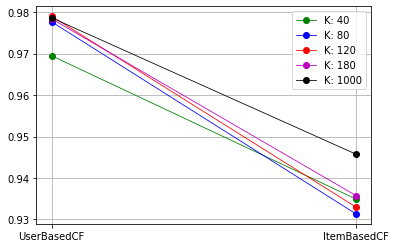

In [106]:
plt.figure()
plt.plot([0.,1.], compare_neighbours_df['k = 40'],'-go', label='K: 40',linewidth=0.8)
plt.plot([0,1], compare_neighbours_df['k = 80'],'-bo', label='K: 80',linewidth=0.8)
plt.plot([0,1], compare_neighbours_df['k = 120'],'-ro', label='K: 120',linewidth=0.8)
plt.plot([0,1], compare_neighbours_df['k = 180'],'-mo', label='K: 180',linewidth=0.8)
plt.plot([0,1], compare_neighbours_df['k = 1000'],'-ko', label='K: 1000',linewidth=0.8)

plt.xticks([0,1], ['UserBasedCF','ItemBasedCF'])
plt.legend()
plt.grid()
plt.show();

## **Observations:**


1.   The Item based CF has lower RMSE than UserCF
2.   From the plot, 180 neigbours seems to give higher RMSE for both Item based CF and User based CF
3. 40 Neighbours seem to look good for User Based CF but not for Item based CF. The ideal number of neighbours seem to be good at 80 or near that value



##**g.	Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE.**


In [119]:
## User based Collaborative Filtering &Item based CF comparision in terms of RMSE and neighbours
algo = KNNBasic
sim_options={'name': ['msd'],'user_based': [True]}
UCF_neighbours_Grid = GridSearchCV(algo, param_grid = {'k': [40,50,80,120,180], 'sim_options': sim_options},measures=['rmse'], cv = 5)
UCF_neighbours_Grid.fit(ratings_data)
print("Best RMSE value for User based CF:", UCF_neighbours_Grid.best_score['rmse'])
print("Best k for User Based CF:", UCF_neighbours_Grid.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [120]:

sim_options_Item={'name': ['msd'],'user_based': [False]}
ICF_neighbours_Grid = GridSearchCV(algo, param_grid = {'k': [40,50,80,120,180], 'sim_options': sim_options_Item},measures=['rmse'], cv = 5)
ICF_neighbours_Grid.fit(ratings_data)
print("Best RMSE value for Item based CF:", ICF_neighbours_Grid.best_score['rmse'])
print("Best k for Item Based CF:", ICF_neighbours_Grid.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

 ## **Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?**

 No. the best K of User based CF is not the same as the best K of Item based CF. User based CF performs best when k is 40, howver Item based CF performs best when k = 80. The plot that was plotted above also depcits the same result as GridsearchCV.